#**Auto-Encoding Variational Bayes**



In [1]:
# Install the library
%pip install pythae

In [2]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

#Data Preparation

Downloads the MNIST training dataset.

Splits the last 10,000 images for evaluation.

Reshapes images to (1, 28, 28) format and normalizes pixel values to [0, 1]

In [3]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 617kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.90MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.29MB/s]


# Model and Training Configuration
Imports VAE model and config, training utilities, and pre-defined ResNet-based encoder/decoder for MNIST.

In [4]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST

Sets training configurations like learning rate, batch sizes, number of epochs, and optimizer

Defines VAE model input shape and latent space dimensionality (16-D latent space).

Creates the VAE using a ResNet encoder and decoder

In [5]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=10, # Change this to train the model a bit more
    optimizer_cls="AdamW",
    optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)


model_config = VAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config),
    decoder=Decoder_ResNet_AE_MNIST(model_config)
)

Sets up a training pipeline using the model and training configuration.

In [6]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

Trains the VAE model on train_dataset and evaluates on eval_dataset.

In [7]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model folder since did not exist.

Created my_model/VAE_training_2025-04-15_19-11-51. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model/VAE_training_2025-04-15_19-11-51. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_

Training of epoch 1/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 1/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 27.3236
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 27.3236
Eval loss: 21.6058
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 21.6058
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 2/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 20.9323
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 20.9323
Eval loss: 20.3523
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 20.3523
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 3/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 20.2663
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 20.2663
Eval loss: 19.8665
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.8665
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 4/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.9273
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.9273
Eval loss: 19.7069
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.7069
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 5/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.7045
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.7045
Eval loss: 19.49
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.49
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 6/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.5146
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.5146
Eval loss: 19.2801
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.2801
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 7/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.3573
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.3573
Eval loss: 19.2703
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.2703
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 8/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.2922
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.2922
Eval loss: 19.0791
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.0791
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 9/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.1821
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.1821
Eval loss: 19.0565
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 19.0565
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 10/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 19.086
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 19.086
Eval loss: 18.9844
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 18.9844
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_model/VAE_training_2025-04-15_19-11-51/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_model/VAE_training_2025-04-15_19-11-51/final_model


#  Load the Trained Model

Loads the most recently trained model from the my_model directory

In [8]:
import os
from pythae.models import AutoModel

In [9]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

#  Normal Sampler

Samples 25 new images from a standard Gaussian latent distribution using the trained decoder

In [10]:
from pythae.samplers import NormalSampler

In [11]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [12]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [13]:
import matplotlib.pyplot as plt

Plots the 25 generated images in a 5x5 grid.

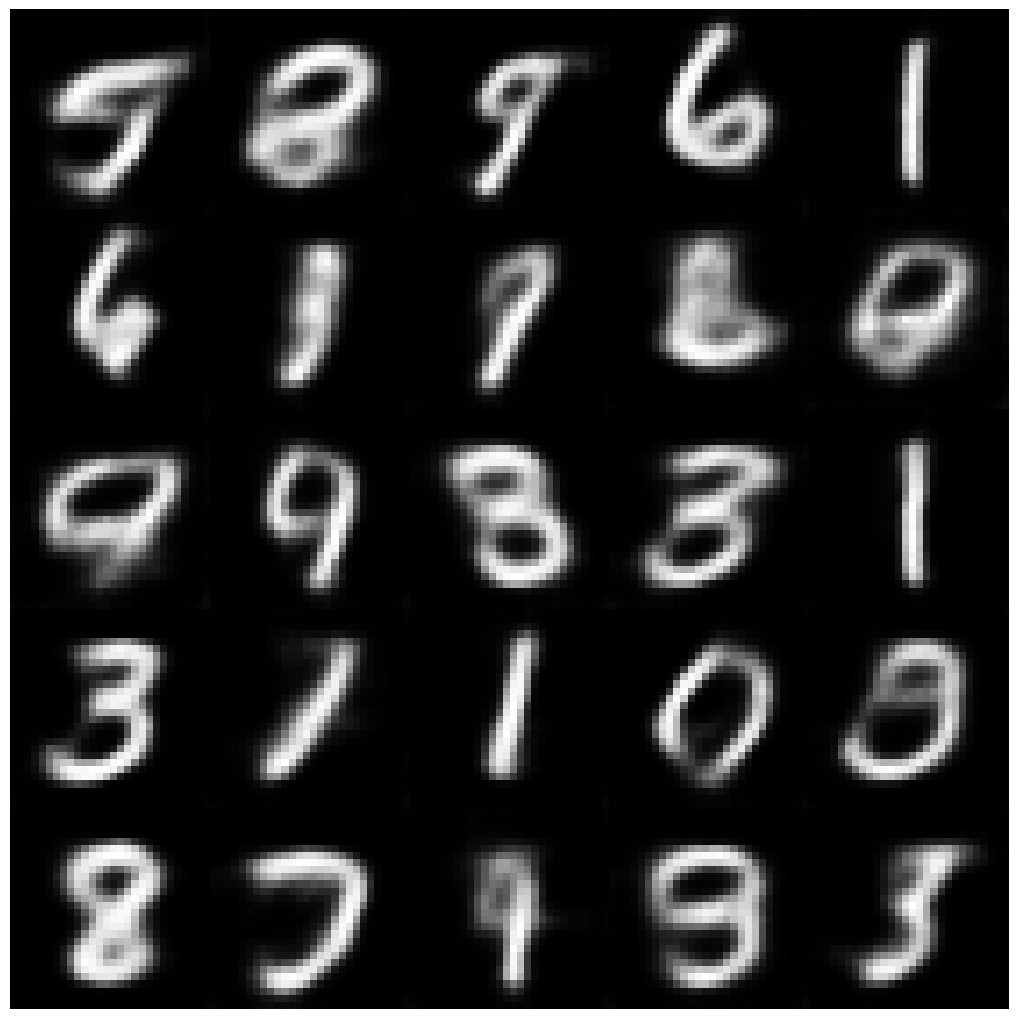

In [14]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

#  Gaussian Mixture Sampler

Fits a Gaussian Mixture Model (GMM) with 10 components to the latent space and generates 25 new samples.

Plots GMM-sampled digits similarly.

In [15]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [16]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [17]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

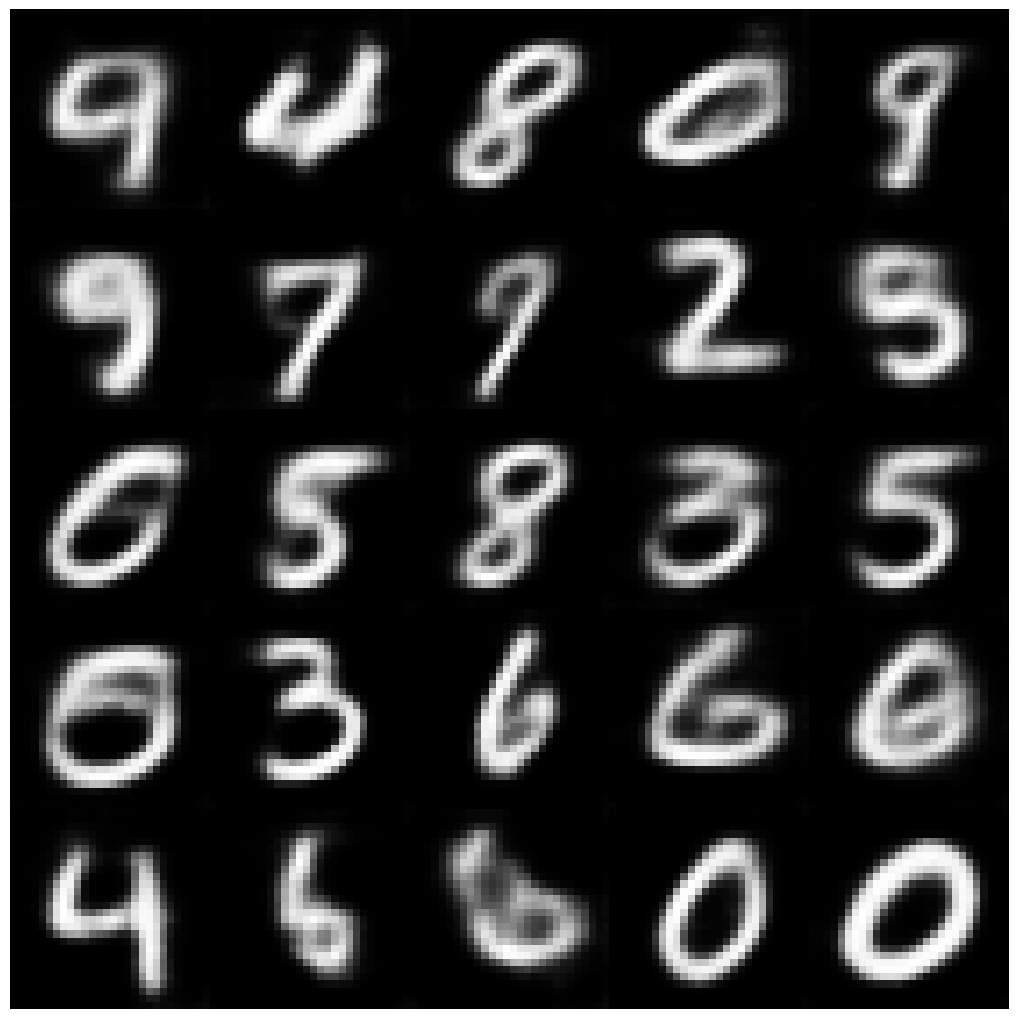

In [18]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same

## Visualizing reconstructions
Reconstructs the first 25 images from the evaluation dataset using the trained model.

Plots the reconstructed images.

Plots the corresponding original images for comparison.

In [19]:
reconstructions = trained_model.reconstruct(eval_dataset[:25].to(device)).detach().cpu()

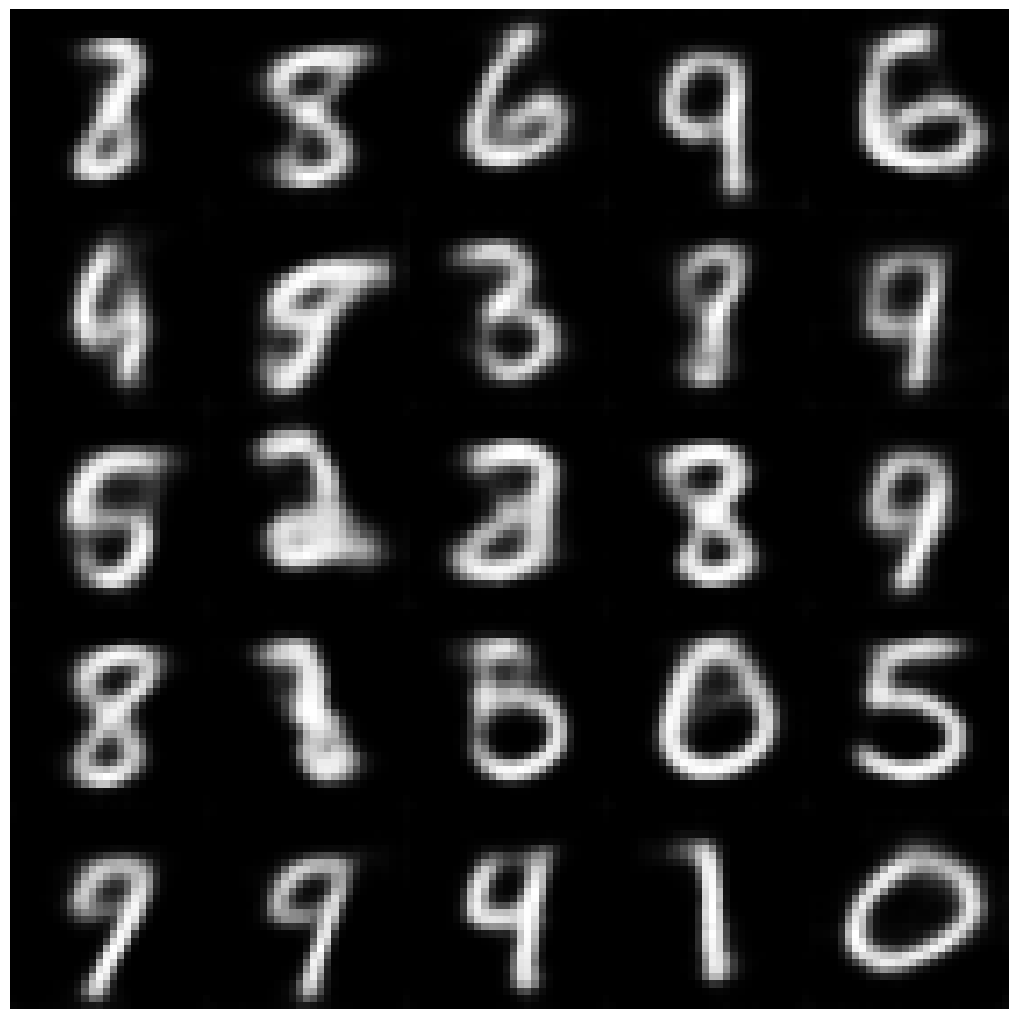

In [20]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

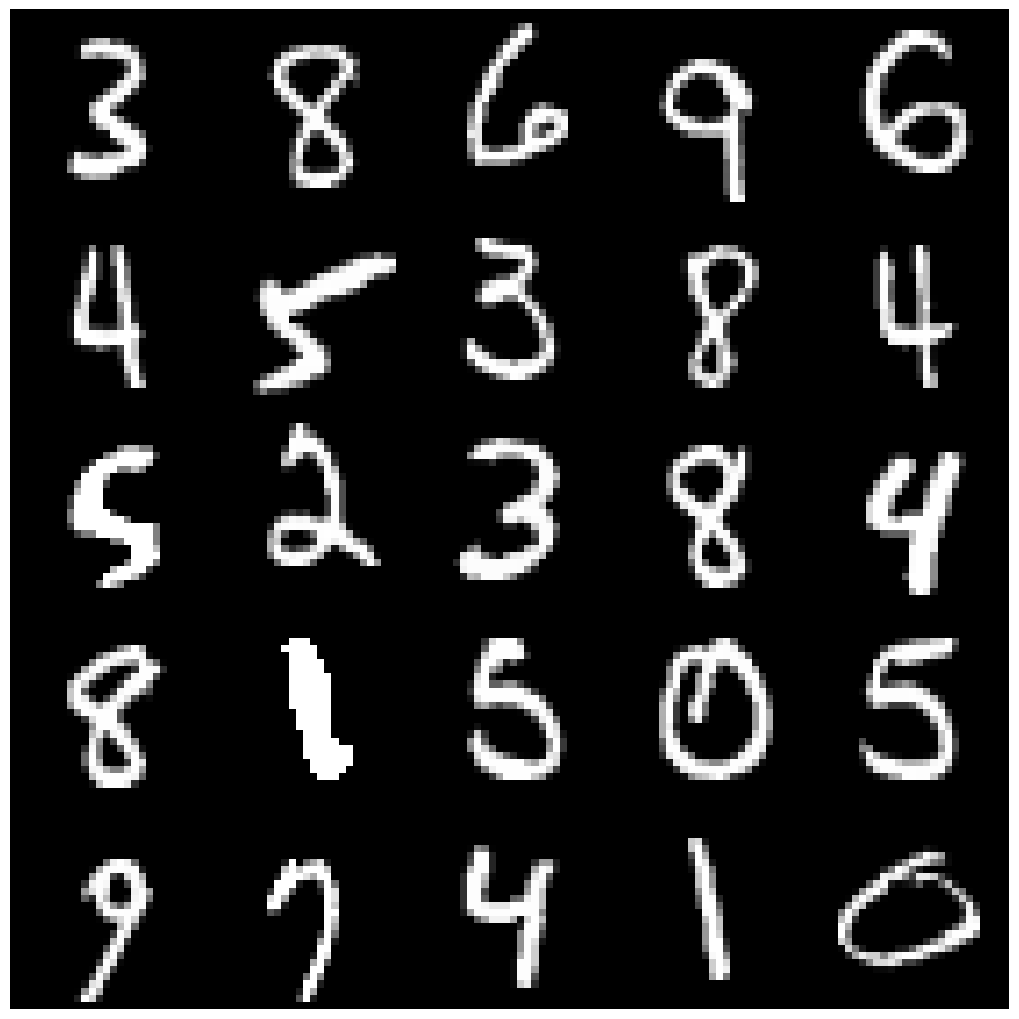

In [21]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## Visualizing interpolations

Performs linear interpolation in the latent space between pairs of input images (from 0→5 to 5→10) in 10 steps

Displays the interpolations in a 5x10 grid where each row shows a transition between two digits.



In [22]:
interpolations = trained_model.interpolate(eval_dataset[:5].to(device), eval_dataset[5:10].to(device), granularity=10).detach().cpu()

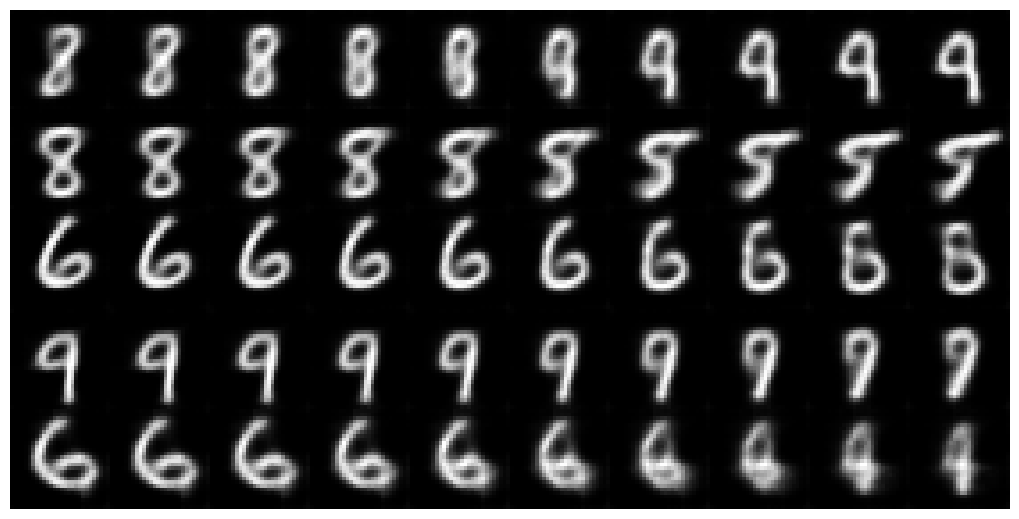

In [23]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

# SUMMARY

## 🧠 Variational Autoencoder (VAE) using PyTorch & PyTorchAE on MNIST

This notebook demonstrates the complete workflow of training a Variational Autoencoder (VAE) on the MNIST dataset using the [PyTorchAE (pythae)](https://github.com/clementchadebec/benchmark_VAE_PyTorchAE) library. It includes:

- ✅ Loading and preparing the MNIST dataset.
- 🧠 Defining and training a ResNet-based VAE model.
- 🎲 Generating new digit samples using different sampling techniques (Normal, GMM).
- 🔁 Visualizing model reconstructions of input digits.
- 🧬 Interpolating between digit pairs in the latent space.

✅ Conclusion
This notebook provides a complete workflow to:

Train a VAE on MNIST.

Generate, reconstruct, and interpolate handwritten digits.

Explore latent space representations using standard and advanced samplers (e.g., GMM).


